# 1. Covariance & Correlation

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
symbol = "GOOG"
goog = yf.download(tickers=symbol, interval="1d")
goog.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.493011,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.691030,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.718112,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.605561,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.633636,184645512


In [3]:
goog = goog.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
goog

,Close
Date,
2004-08-19,2.499133
2004-08-20,2.697639
2004-08-23,2.724787
2004-08-24,2.611960
2004-08-25,2.640104
...,...
2024-11-18,176.800003
2024-11-19,179.580002
2024-11-20,177.330002


<Axes: xlabel='Date'>

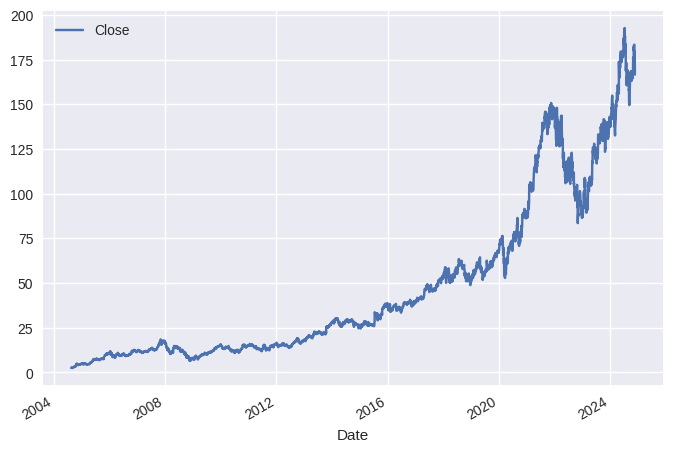

In [4]:
goog.plot()

In [5]:
goog_returns = np.log(goog.pct_change(1) + 1)
goog_returns

,Close
Date,
2004-08-19,NaN
2004-08-20,0.076433
2004-08-23,0.010013
2004-08-24,-0.042289
2004-08-25,0.010717
...,...
2024-11-18,0.016596
2024-11-19,0.015602
2024-11-20,-0.012608


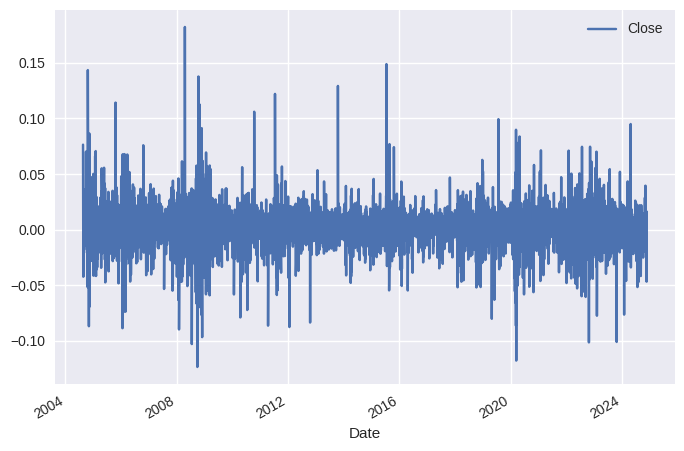

In [6]:
goog_returns.plot();

In [7]:
goog['SMA_10'] = goog['Close'].rolling(10).mean()
goog.head(20)

,Close,SMA_10
Date,,
2004-08-19,2.499133,NaN
2004-08-20,2.697639,NaN
2004-08-23,2.724787,NaN
2004-08-24,2.611960,NaN
2004-08-25,2.640104,NaN
2004-08-26,2.687676,NaN
2004-08-27,2.643840,NaN
2004-08-30,2.540727,NaN
2004-08-31,2.549693,NaN


In [8]:
type(goog['Close'].rolling(10))

pandas.core.window.rolling.Rolling

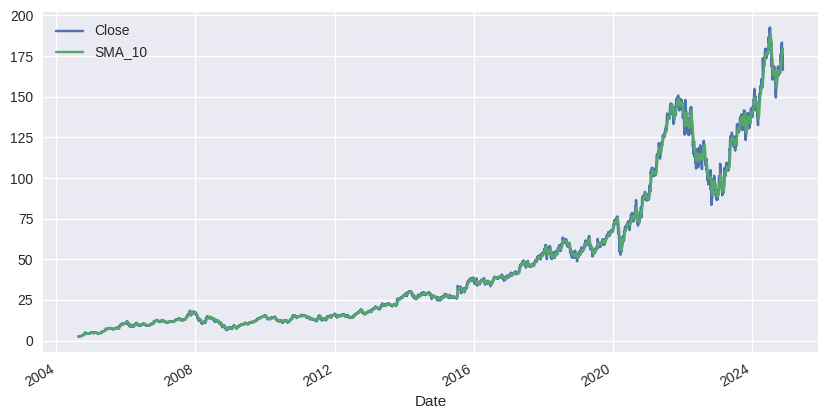

In [9]:
goog.plot(figsize=(10, 5));

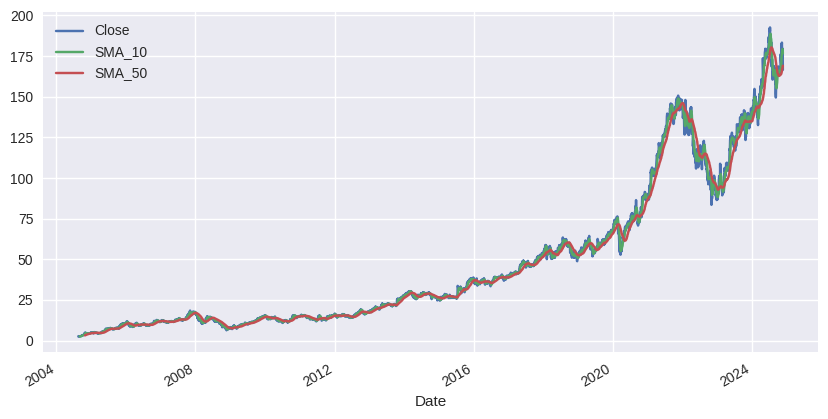

In [10]:
goog['SMA_50'] = goog['Close'].rolling(50).mean()
goog.plot(figsize=(10, 5));

In [11]:
df = yf.download(tickers=['GOOG', 'AAPL'], interval="1d")
df.head()

[*********************100%***********************]  2 of 2 completed


Price                     Adj Close          Close           High       \
Ticker                         AAPL GOOG      AAPL GOOG      AAPL GOOG   
Date                                                                     
1980-12-12 00:00:00+00:00  0.098834  NaN  0.128348  NaN  0.128906  NaN   
1980-12-15 00:00:00+00:00  0.093678  NaN  0.121652  NaN  0.122210  NaN   
1980-12-16 00:00:00+00:00  0.086802  NaN  0.112723  NaN  0.113281  NaN   
1980-12-17 00:00:00+00:00  0.088951  NaN  0.115513  NaN  0.116071  NaN   
1980-12-18 00:00:00+00:00  0.091530  NaN  0.118862  NaN  0.119420  NaN   

Price                           Low           Open          Volume       
Ticker                         AAPL GOOG      AAPL GOOG       AAPL GOOG  
Date                                                                     
1980-12-12 00:00:00+00:00  0.128348  NaN  0.128348  NaN  469033600  NaN  
1980-12-15 00:00:00+00:00  0.121652  NaN  0.122210  NaN  175884800  NaN  
1980-12-16 00:00:00+00:00  0.112723  NaN  0.113281  NaN  105728000  NaN  
1980-12-17 00:00:00+00:00  0.115513  NaN  0.115513  NaN   86441600  NaN  
1980-12-18 00:00:00+00:00  0.118862  NaN  0.118862  NaN   73449600  NaN

In [12]:
goog_aapl = df.Close.copy()
goog_aapl_cov = goog_aapl.rolling(50).cov()
goog_aapl_cov

Ticker                                 AAPL       GOOG
Date                      Ticker                      
1980-12-12 00:00:00+00:00 AAPL          NaN        NaN
                          GOOG          NaN        NaN
1980-12-15 00:00:00+00:00 AAPL          NaN        NaN
                          GOOG          NaN        NaN
1980-12-16 00:00:00+00:00 AAPL          NaN        NaN
...                                     ...        ...
2024-11-20 00:00:00+00:00 GOOG     1.149891  46.554154
2024-11-21 00:00:00+00:00 AAPL    19.240604  -0.127908
                          GOOG    -0.127908  42.975374
2024-11-22 00:00:00+00:00 AAPL    18.796810  -1.358314
                          GOOG    -1.358314  40.786808

[22160 rows x 2 columns]

In [13]:
goog_aapl_cov.loc['2024-11-22'].to_numpy()

array([[18.79680962, -1.35831406],
       [-1.35831406, 40.78680801]])

In [14]:
goog_aapl_returns = np.log(1 + goog_aapl.pct_change(1))
goog_aapl_returns.head()

Ticker,AAPL,GOOG
Date,,
1980-12-12 00:00:00+00:00,NaN,NaN
1980-12-15 00:00:00+00:00,-0.053581,NaN
1980-12-16 00:00:00+00:00,-0.076231,NaN
1980-12-17 00:00:00+00:00,0.024450,NaN
1980-12-18 00:00:00+00:00,0.028580,NaN


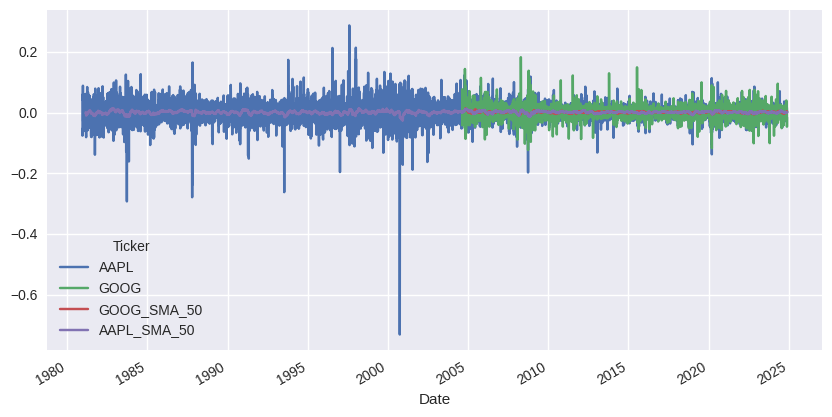

In [15]:
goog_aapl_returns['GOOG_SMA_50'] = goog_aapl_returns['GOOG'].rolling(50).mean()
goog_aapl_returns['AAPL_SMA_50'] = goog_aapl_returns['AAPL'].rolling(50).mean()
goog_aapl_returns.plot(figsize=(10, 5));

In [16]:
goog_aapl_returns_covariance = goog_aapl_returns[['GOOG', 'AAPL']].rolling(50).cov()
goog_aapl_returns_covariance.tail()

Ticker                                GOOG      AAPL
Date                      Ticker                    
2024-11-20 00:00:00+00:00 AAPL    0.000043  0.000172
2024-11-21 00:00:00+00:00 GOOG    0.000221  0.000045
                          AAPL    0.000045  0.000172
2024-11-22 00:00:00+00:00 GOOG    0.000221  0.000044
                          AAPL    0.000044  0.000172

In [17]:
goog_aapl_returns_corr = goog_aapl_returns[['GOOG', 'AAPL']].rolling(50).corr()
goog_aapl_returns_corr.tail(16)

Ticker                                GOOG      AAPL
Date                      Ticker                    
2024-11-13 00:00:00+00:00 GOOG    1.000000  0.265703
                          AAPL    0.265703  1.000000
2024-11-14 00:00:00+00:00 GOOG    1.000000  0.227721
                          AAPL    0.227721  1.000000
2024-11-15 00:00:00+00:00 GOOG    1.000000  0.242946
                          AAPL    0.242946  1.000000
2024-11-18 00:00:00+00:00 GOOG    1.000000  0.263908
                          AAPL    0.263908  1.000000
2024-11-19 00:00:00+00:00 GOOG    1.000000  0.262422
                          AAPL    0.262422  1.000000
2024-11-20 00:00:00+00:00 GOOG    1.000000  0.243787
                          AAPL    0.243787  1.000000
2024-11-21 00:00:00+00:00 GOOG    1.000000  0.233389
                          AAPL    0.233389  1.000000
2024-11-22 00:00:00+00:00 GOOG    1.000000  0.226394
                          AAPL    0.226394  1.000000

# 2. ARIMA

In [18]:
# Install `pmdarima`
# !pip install pmdarima
import pmdarima as pm

In [19]:
df = pd.read_csv('datasets/sp500sub.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


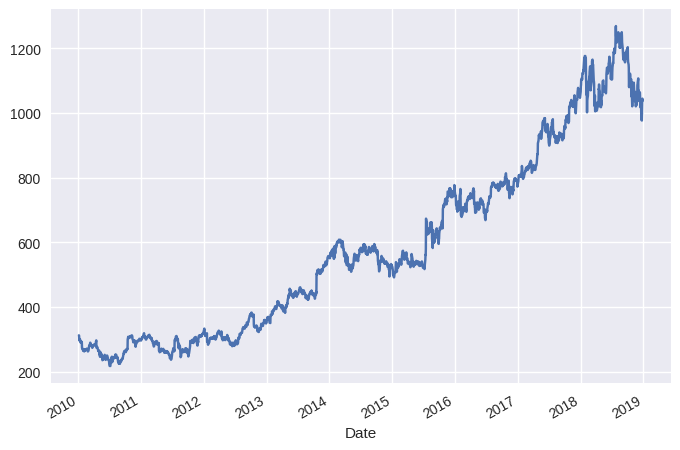

In [20]:
goog = df[df['Name'] == 'GOOG']['Close']
goog.plot();

In [21]:
number_of_test_data = 30
train = goog.iloc[:-number_of_test_data]
test = goog.iloc[-number_of_test_data:]
print("Number of Training Set:", len(train))
print("Number of Testing Set:", len(test))

Number of Training Set: 2233
Number of Testing Set: 30


In [22]:
model = pm.auto_arima(train,
                      error_action='ignore', 
                      trace=True,
                      suppress_warnings=True, 
                      maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=0.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.05 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 1.774 seconds


In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Sat, 23 Nov 2024   AIC                          16264.983
Time:                        16:37:19   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


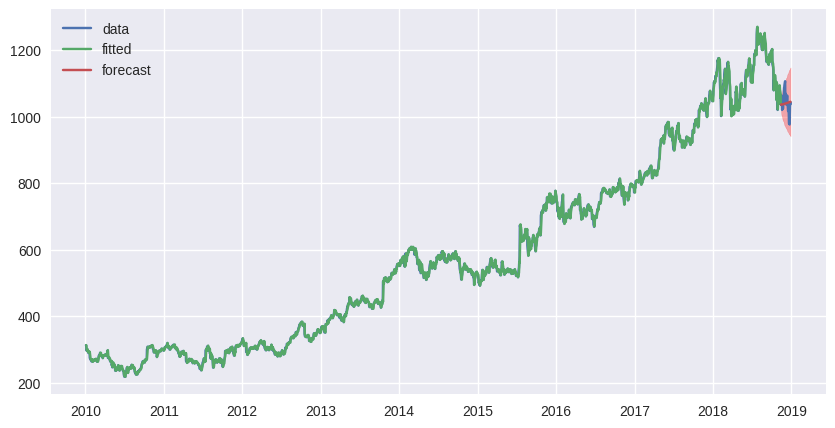

In [25]:
def plot_result(model, full_data, train, test, number_of_test_data):
    params = model.get_params()
    d = params['order'][1]

    train_pred = model.predict_in_sample(start=d, end=-1)
    test_pred, confint = model.predict(n_periods=number_of_test_data, return_conf_int=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(full_data.index, full_data, label='data')
    ax.plot(train.index[d:], train_pred, label='fitted')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
    ax.legend();

plot_result(model, goog, train, test, number_of_test_data)

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


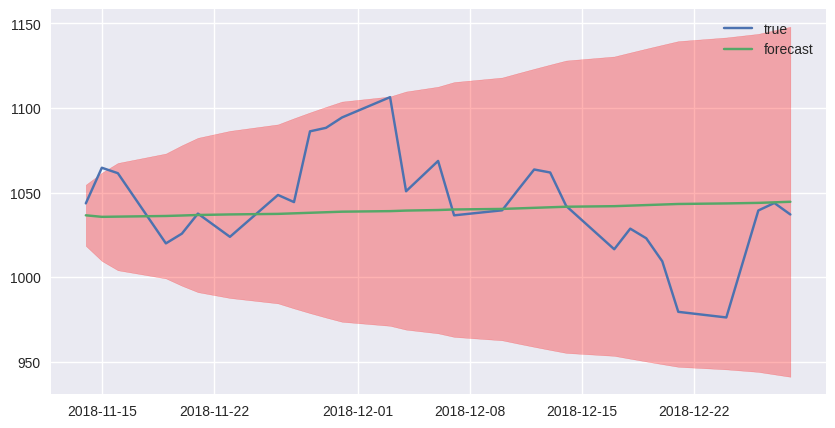

In [26]:
def plot_test(model, test, number_of_test_data):
    test_pred, confint = model.predict(n_periods=number_of_test_data, return_conf_int=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(test.index, test, label='true')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
    ax.legend();

plot_test(model, test, number_of_test_data)

In [27]:
def rmse(y, t):
    return np.sqrt(np.mean((t - y)**2))

print("RMSE ARIMA:", rmse(model.predict(number_of_test_data).to_numpy(), test.to_numpy()))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 30.436602005035915
RMSE Naive: 30.029502477261467


/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


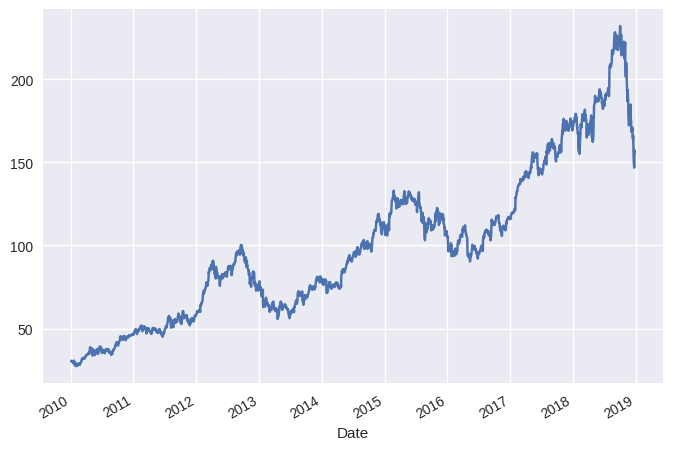

In [28]:
aapl = df[df['Name'] == 'AAPL']['Close']
aapl.plot();

In [29]:
train = aapl.iloc[:-number_of_test_data]
test = aapl.iloc[-number_of_test_data:]

model = pm.auto_arima(train,
                      error_action='ignore', 
                      trace=True,
                      suppress_warnings=True, 
                      maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.296, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8571.332, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8572.500, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8572.527, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8574.574, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8570.852, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.880, Time=0.26 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8579.289, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8572.973, Time=0.08 sec

Best model:  ARIMA(2,1,2)(0,0,0)

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4279.148
Date:                Sat, 23 Nov 2024   AIC                           8570.296
Time:                        16:37:21   BIC                           8604.560
Sample:                             0   HQIC                          8582.808
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0803      0.042      1.896      0.058      -0.003       0.163
ar.L1          0.3755      0.165      2.279      0.023       0.053       0.699
ar.L2         -0.4239      0.176     -2.407      0.016      -0.769      -0.079
ma.L1         -0.3433      0.172     -2.002      0.045      -0.679      -0.007
ma.L2          0.3579      0.183      1.958      0.050      -0.000       0.716
sigma2         2.7182      0.039     69.453      0.000       2.642       2.795
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6223.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


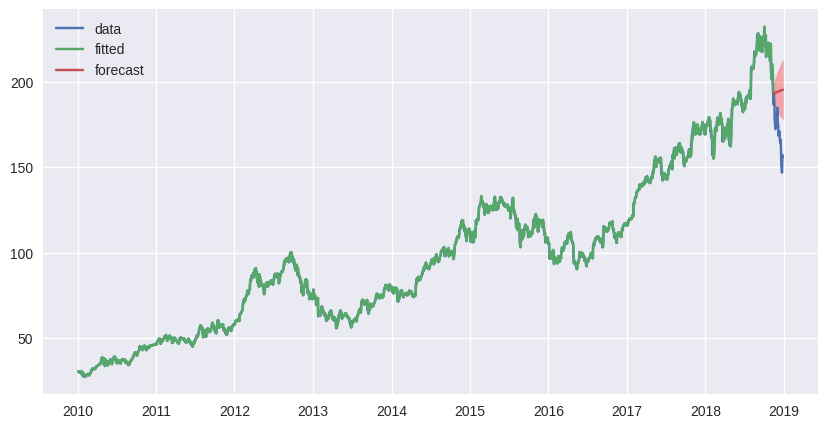

In [31]:
plot_result(model, aapl, train, test, number_of_test_data)

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


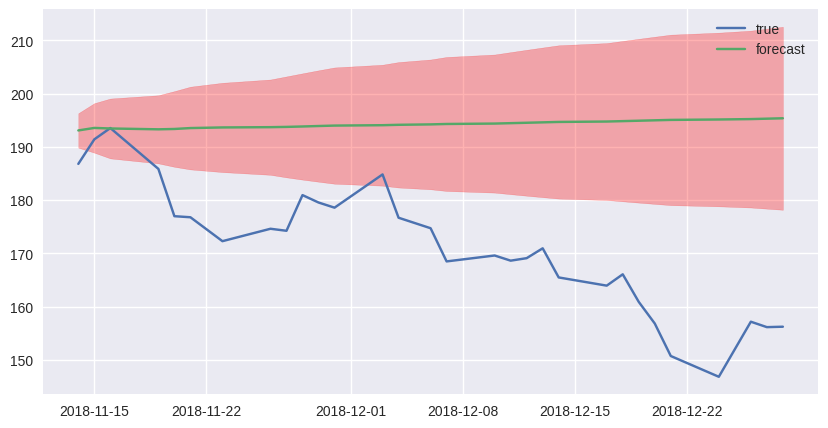

In [32]:
plot_test(model, test, number_of_test_data)

In [33]:
print("RMSE ARIMA:", rmse(model.predict(number_of_test_data).to_numpy(), test.to_numpy()))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 26.094961247796412
RMSE Naive: 24.02712058667382


/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [91]:
# ARIMA with SMA
goog_sma = goog['Close'].rolling(10).mean().dropna()
goog_sma.head()

Date
2010-01-15    299.061539
2010-01-19    297.112344
2010-01-20    294.941483
2010-01-21    293.682202
2010-01-22    291.485934
Name: Close, dtype: float64

In [92]:
number_of_test_data = 30
train_sma = goog_sma.iloc[:-number_of_test_data]
train = goog['Close'].iloc[9:-number_of_test_data]
test_sma = goog_sma.iloc[-number_of_test_data:]
test = goog['Close'].iloc[-number_of_test_data:]
print("Number of Training Set SMA Data:", len(train_sma))
print("Number of Training Set Data:", len(train))
print("Number of Testing Set SMA Data:", len(test_sma))
print("Number of Testing Set Data:", len(test))

Number of Training Set SMA Data: 2224
Number of Training Set Data: 2224
Number of Testing Set SMA Data: 30
Number of Testing Set Data: 30


In [93]:
model = pm.auto_arima(y=train,
                      X=train_sma.to_frame(),
                      error_action='ignore', 
                      trace=True,
                      suppress_warnings=True, 
                      maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=15855.293, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23000.114, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=15872.155, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=17113.583, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=15833.310, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=16498.946, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=15834.043, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=15804.138, Time=0.23 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=16211.266, Time=0.21 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=15753.740, Time=0.31 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=15758.570, Time=0.30 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=15758.692, Time=0.35 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=15788.357, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=15927.392, Time=0.30 sec
 ARIMA(3,0,4)(0,0,0

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


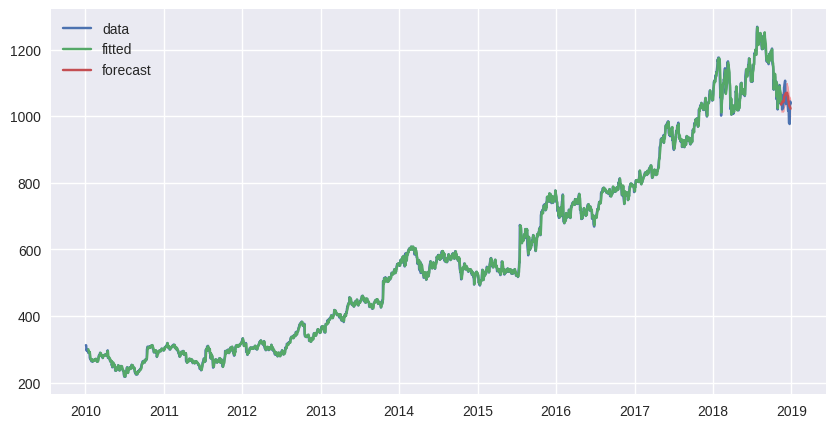

In [99]:
def plot_result(model, full_data, train, train_sma, test, test_sma, number_of_test_data):
    params = model.get_params()
    d = params['order'][1]

    train_pred = model.predict_in_sample(X=train_sma.to_frame(), start=d, end=-1)
    test_pred, confint = model.predict(n_periods=number_of_test_data, X=test_sma.to_frame(), return_conf_int=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(full_data.index, full_data, label='data')
    ax.plot(train.index[d:], train_pred, label='fitted')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
    ax.legend();

plot_result(model, goog['Close'], train, train_sma, test, test_sma, number_of_test_data)

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


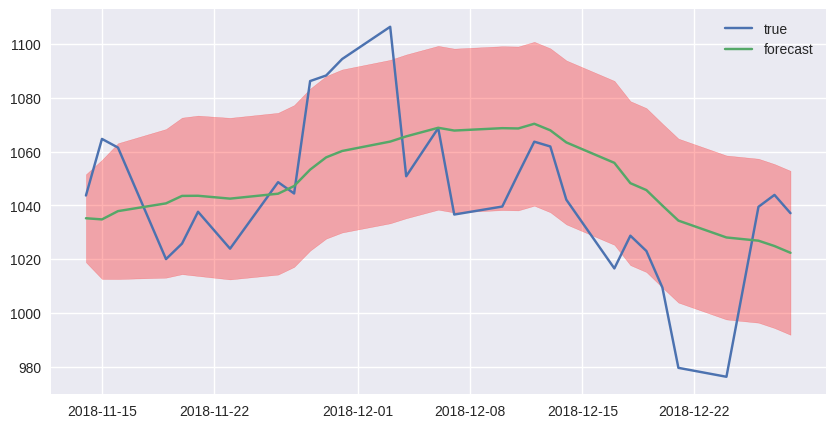

In [101]:
def plot_test(model, test, test_sma, number_of_test_data):
    test_pred, confint = model.predict(n_periods=number_of_test_data, X=test_sma.to_frame(), return_conf_int=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(test.index, test, label='true')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
    ax.legend();

plot_test(model, test, test_sma, number_of_test_data)

In [ ]:
print("RMSE ARIMA with SMA:", rmse(model.predict(n_periods=number_of_test_data, X=test_sma.to_frame()).to_numpy(), test.to_numpy()))
print("RMSE Naive:", rmse(train.iloc[-1], test))

In [102]:
# ARIMA with SMA
aapl_sma = aapl['Close'].rolling(10).mean().dropna()
aapl_sma.head()

Date
2010-01-15    30.082286
2010-01-19    30.097000
2010-01-20    30.059143
2010-01-21    30.017714
2010-01-22    29.834429
Name: Close, dtype: float64

In [103]:
number_of_test_data = 30
train_sma = aapl_sma.iloc[:-number_of_test_data]
train = aapl['Close'].iloc[9:-number_of_test_data]
test_sma = aapl_sma.iloc[-number_of_test_data:]
test = aapl['Close'].iloc[-number_of_test_data:]
print("Number of Training Set SMA Data:", len(train_sma))
print("Number of Training Set Data:", len(train))
print("Number of Testing Set SMA Data:", len(test_sma))
print("Number of Testing Set Data:", len(test))

Number of Training Set SMA Data: 2224
Number of Training Set Data: 2224
Number of Testing Set SMA Data: 30
Number of Testing Set Data: 30


In [104]:
model = pm.auto_arima(y=train,
                      X=train_sma.to_frame(),
                      error_action='ignore', 
                      trace=True,
                      suppress_warnings=True, 
                      maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=8169.035, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10812.047, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8148.678, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9344.187, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=8120.813, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=8122.390, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8122.052, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8122.060, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=8124.603, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=8122.595, Time=0.15 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.172 seconds


/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


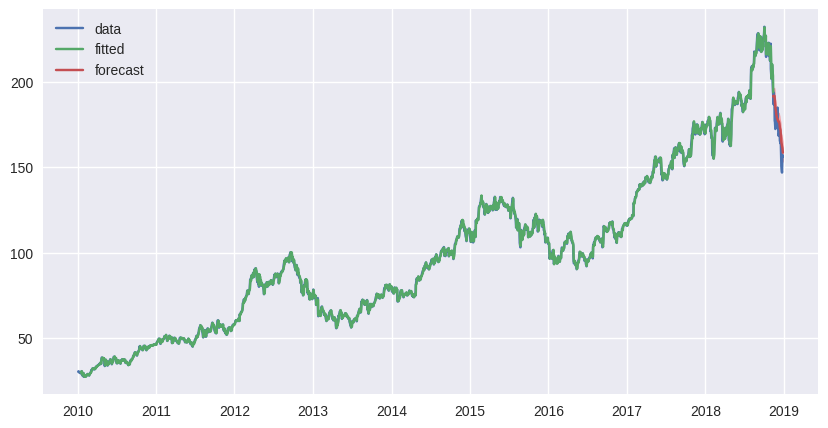

In [105]:
plot_result(model, aapl['Close'], train, train_sma, test, test_sma, number_of_test_data)

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


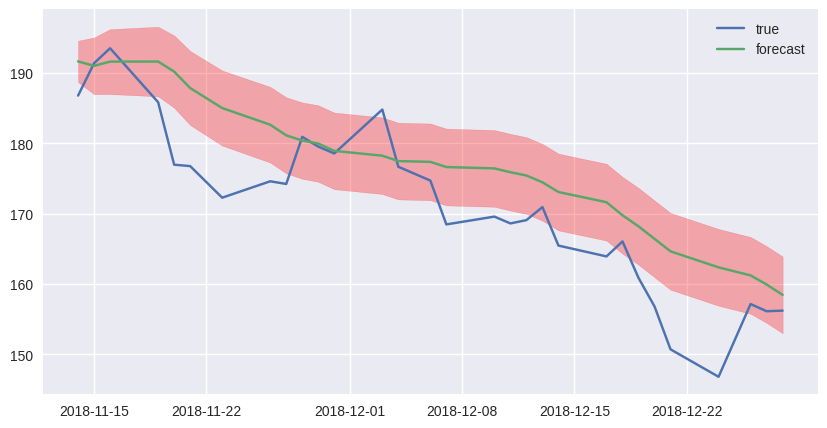

In [106]:
plot_test(model, test, test_sma, number_of_test_data)

In [107]:
print("RMSE ARIMA with SMA:", rmse(model.predict(n_periods=number_of_test_data, X=test_sma.to_frame()).to_numpy(), test.to_numpy()))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA with SMA: 7.424322754230566
RMSE Naive: 24.02712058667382


/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# 3. Autocorrelation Function (ACF) & Partial Autocorrelation Function (PACF)

In [38]:
df = pd.read_csv('datasets/sp500sub.csv', index_col='Date', parse_dates=True)
goog = df[df['Name'] == 'GOOG'][['Close']].copy()
goog.head()

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956


In [39]:
def log_returns(price):
    log_price = np.log(price)
    return log_price.diff()

goog['Returns'] = log_returns(goog['Close'])
goog.head()

,Close,Returns
Date,,
2010-01-04,312.204773,NaN
2010-01-05,310.829926,-0.004413
2010-01-06,302.994293,-0.025532
2010-01-07,295.940735,-0.023555
2010-01-08,299.885956,0.013243


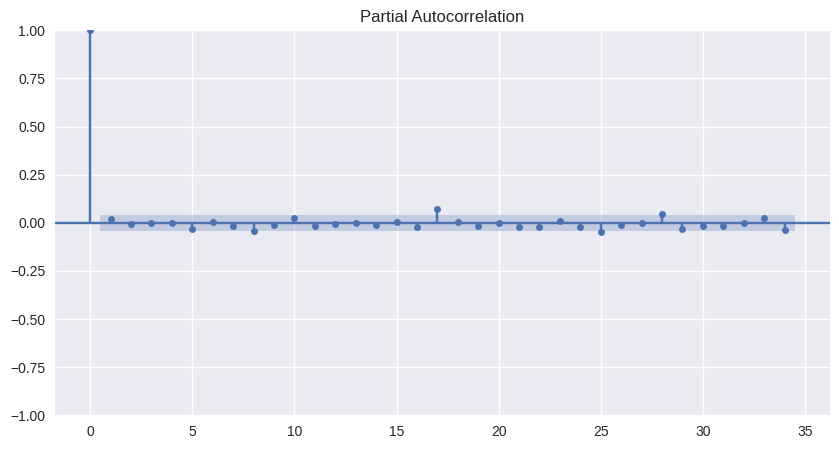

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(goog['Returns'].dropna(), ax=ax);

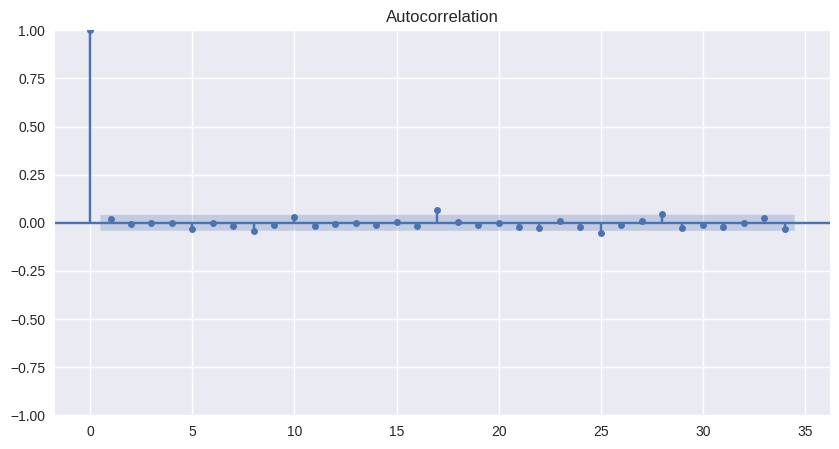

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(goog['Returns'].dropna(), ax=ax);

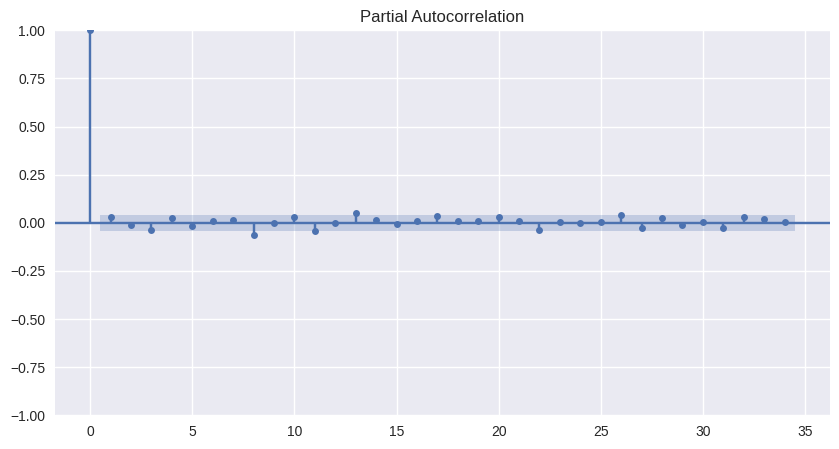

In [44]:
aapl = df[df['Name'] == 'AAPL'][['Close']].copy()
aapl['Returns'] = log_returns(aapl['Close'])

fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(aapl['Returns'].dropna(), ax=ax);

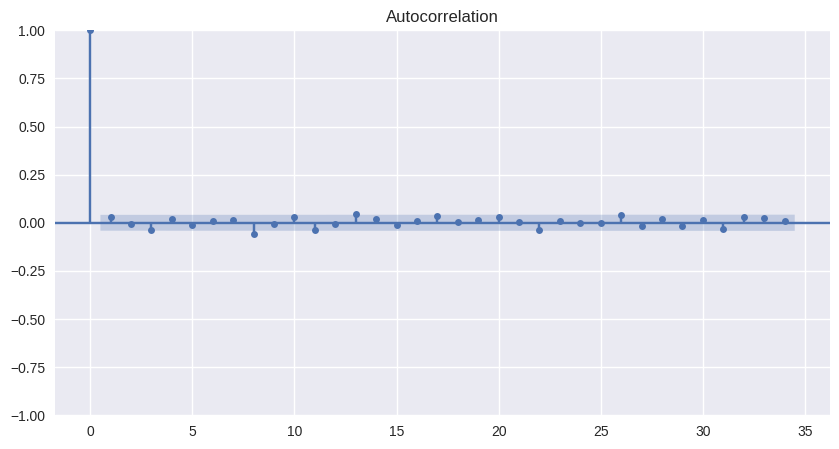

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(aapl['Returns'].dropna(), ax=ax);